# Import module

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import string
import pickle
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import nltk
nltk.download('stopwords')

c:\Users\Tairo Kageyama\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package stopwords to C:\Users\Tairo
[nltk_data]     Kageyama\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Import data

In [2]:
df1 = pd.read_csv('./data/email_classification.csv')
df3 = pd.read_csv('./data/email.csv')

In [3]:
df1[['label', 'email']] = df1[['email', 'label']]
df1.columns = ['Category','Message']

In [4]:
df2 = pd.read_csv('./data/spam_ham_dataset.csv')

In [5]:
df1.head(5)

,Category,Message
0,ham,Upgrade to our premium plan for exclusive acce...
1,ham,Happy holidays from our team! Wishing you joy ...
2,ham,We're hiring! Check out our career opportuniti...
3,spam,Your Amazon account has been locked. Click her...
4,ham,Your opinion matters! Take our survey and help...


In [6]:
df2.head(5)

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [7]:
df2 = df2.drop(df2.columns[[0, 3]], axis=1)

In [8]:
df2.head(5)

,label,text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...


In [9]:
df2.columns = ['Category','Message']

In [10]:
df = pd.concat([df1, df2], ignore_index=True)
# df = pd.concat([df3, df2], ignore_index=True)
df

,Category,Message
0,ham,Upgrade to our premium plan for exclusive acce...
1,ham,Happy holidays from our team! Wishing you joy ...
2,ham,We're hiring! Check out our career opportuniti...
3,spam,Your Amazon account has been locked. Click her...
4,ham,Your opinion matters! Take our survey and help...
...,...,...
5345,ham,Subject: put the 10 on the ft\r\nthe transport...
5346,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...
5347,ham,Subject: calpine daily gas nomination\r\n>\r\n...
5348,ham,Subject: industrial worksheets for august 2000...


# Preprocessing

In [11]:
# Load English stopwords
stop_words = set(stopwords.words('english'))
def preprocess_text(text):
    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    # Convert to lowercase
    text = text.lower()
    # Tokenize words
    words = text.split()
    # Remove stopwords
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

df['Message'] = df['Message'].apply(preprocess_text)
df

,Category,Message
0,ham,upgrade premium plan exclusive access premium ...
1,ham,happy holidays team wishing joy prosperity season
2,ham,hiring check career opportunities join dynamic...
3,spam,amazon account locked click verify account inf...
4,ham,opinion matters take survey help us enhance ex...
...,...,...
5345,ham,subject put 10 ft transport volumes decreased ...
5346,ham,subject 3 4 2000 following noms hpl take extra...
5347,ham,subject calpine daily gas nomination julie men...
5348,ham,subject industrial worksheets august 2000 acti...


In [12]:
df.shape

(5350, 2)

In [13]:
# Find unique Category
df['Category'].value_counts()

ham     3772
spam    1578
Name: Category, dtype: int64

In [14]:
# Remove rows with invalid categories
valid_categories = ['ham', 'spam']
df = df[df['Category'].isin(valid_categories)]
df.shape

(5350, 2)

In [15]:
# Encode the 'Category' column: 0 for ham, 1 for spam
df['Category'] = df['Category'].map({'ham': 0, 'spam': 1})

In [16]:
df

,Category,Message
0,0,upgrade premium plan exclusive access premium ...
1,0,happy holidays team wishing joy prosperity season
2,0,hiring check career opportunities join dynamic...
3,1,amazon account locked click verify account inf...
4,0,opinion matters take survey help us enhance ex...
...,...,...
5345,0,subject put 10 ft transport volumes decreased ...
5346,0,subject 3 4 2000 following noms hpl take extra...
5347,0,subject calpine daily gas nomination julie men...
5348,0,subject industrial worksheets august 2000 acti...


In [17]:
# Drop duplicates row
df.drop_duplicates(inplace=True)
df

,Category,Message
0,0,upgrade premium plan exclusive access premium ...
1,0,happy holidays team wishing joy prosperity season
2,0,hiring check career opportunities join dynamic...
3,1,amazon account locked click verify account inf...
4,0,opinion matters take survey help us enhance ex...
...,...,...
5343,1,subject slutty milf wants meet take ilaa liqaa
5345,0,subject put 10 ft transport volumes decreased ...
5346,0,subject 3 4 2000 following noms hpl take extra...
5348,0,subject industrial worksheets august 2000 acti...


In [18]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

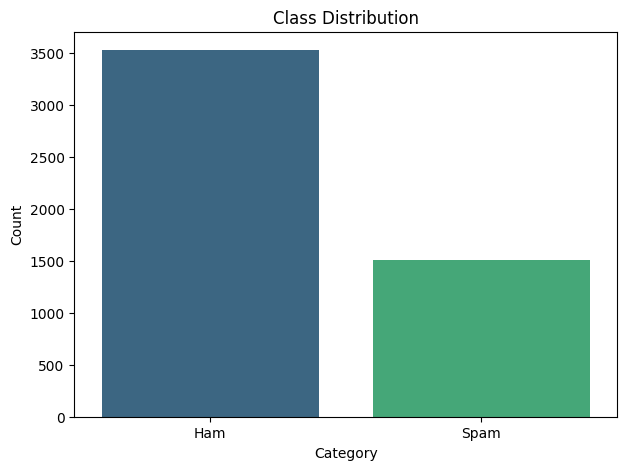

In [19]:
# Plot class distribution
plt.figure(figsize=(7,5))
sns.countplot(x='Category', data=df, palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Ham', 'Spam'])
plt.show()

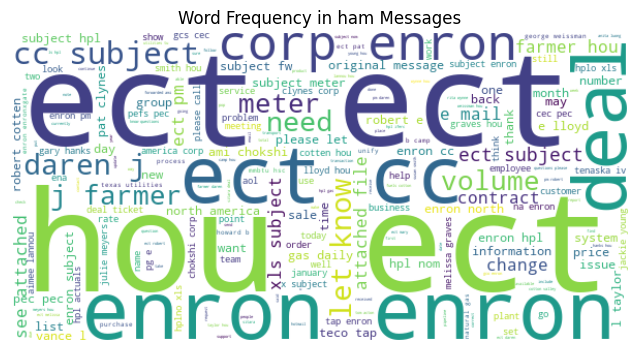

In [20]:
hamtext = ' '.join(df[df['Category'] == 0]['Message'])

# Generate a word cloud
wordcloud = WordCloud(width=600, height=300, background_color='white').generate(hamtext)

# Display the word cloud
plt.figure(figsize=(8, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Frequency in ham Messages')
plt.show()

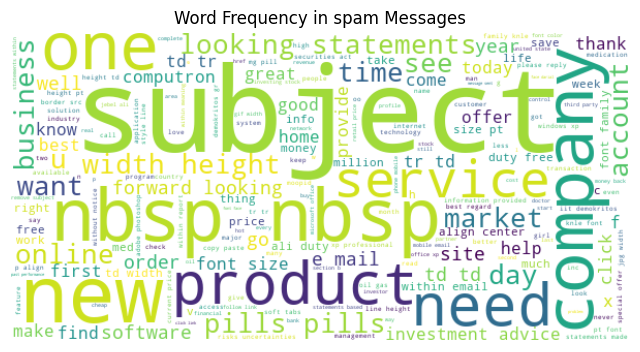

In [21]:
spamtext = ' '.join(df[df['Category'] == 1]['Message'])

# Generate a word cloud
wordcloud = WordCloud(width=600, height=300, background_color='white').generate(spamtext)

# Display the word cloud
plt.figure(figsize=(8, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Frequency in spam Messages')
plt.show()

In [22]:
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter

words = word_tokenize(hamtext)

# 単語の出現頻度をカウント
word_counts = Counter(words)
word_counts = word_counts.most_common()
# 結果を表示
for word, count in word_counts:
    print(f"{word}: {count}")

ect: 13457
hou: 7044
enron: 6288
subject: 6016
2000: 4201
gas: 2680
com: 2653
deal: 2597
please: 2581
meter: 2404
hpl: 2234
cc: 2221
pm: 2219
1: 1914
2001: 1826
000: 1796
daren: 1776
00: 1771
10: 1717
thanks: 1704
corp: 1637
01: 1602
3: 1552
2: 1479
know: 1360
e: 1308
mmbtu: 1278
11: 1255
j: 1237
forwarded: 1231
need: 1192
12: 1156
farmer: 1061
03: 1052
4: 1043
let: 1032
attached: 1016
5: 1009
02: 989
new: 981
xls: 966
see: 961
may: 925
l: 881
04: 860
volume: 853
would: 848
robert: 846
contract: 844
day: 841
sitara: 836
0: 834
05: 817
08: 777
nom: 764
volumes: 756
get: 746
month: 745
99: 744
09: 740
deals: 728
30: 726
questions: 723
pec: 723
6: 717
texas: 715
ena: 702
price: 701
th: 678
20: 665
9: 655
message: 645
energy: 630
mail: 623
sent: 622
change: 620
file: 620
bob: 620
time: 619
06: 617
7: 612
flow: 611
production: 601
information: 600
call: 590
07: 579
following: 575
8: 553
31: 550
gary: 545
15: 537
mary: 535
ticket: 533
also: 531
us: 527
one: 527
nomination: 516
july: 499
orig

In [23]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = df['Message']
y = df['Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
X_train = tfidf_vectorizer.fit_transform(X_train).toarray()
X_test = tfidf_vectorizer.transform(X_test).toarray()

In [25]:
# models = {
#     'Naive Bayes': MultinomialNB(),
#     'SVM': SVC(kernel='linear', probability=True),
#     'Random Forest': RandomForestClassifier(n_estimators=100)
# }

# results_accuracy = {}
# results_precision = {}
# results_f1_score = {}
# results_recall = {}

# for model_name, model in models.items():
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     # Calculate confusion matrix
#     cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

#     # Plot confusion matrix
#     disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ham', 'Spam'])
#     plt.figure(figsize=(8, 6))
#     disp.plot(cmap='Blues', values_format='d')
#     plt.title('Confusion Matrix')
#     plt.show()

#     accuracy = accuracy_score(y_test, y_pred)
#     precision = precision_score(y_test, y_pred)
#     recall = recall_score(y_test, y_pred)
#     f1 = f1_score(y_test, y_pred)
#     print(f"{model_name} Accuracy: {accuracy:.2f}")
#     print(classification_report(y_test, y_pred))

#     results_accuracy[model_name] = accuracy
#     results_precision[model_name] = precision
#     results_f1_score[model_name] = f1
#     results_recall[model_name] = recall
    
#     # Menyimpan model menggunakan pickle
#     model_filename = f"{model_name}_model.pkl"
#     with open(model_filename, 'wb') as file:
#         pickle.dump(model, file)
#     print(f"{model_name} saved as {model_filename}\n\n")


In [26]:
# plt.figure(figsize=(8, 5))
# plt.bar(results_accuracy.keys(), results_accuracy.values())
# plt.title('Model Comparison')
# plt.xlabel('Model')
# plt.ylabel('Accuracy')
# plt.ylim(0.9, 1.0)
# plt.show()

In [27]:
# plt.figure(figsize=(8, 5))
# plt.bar(results_f1_score.keys(), results_f1_score.values())
# plt.title('Model Comparison')
# plt.xlabel('Model')
# plt.ylabel('f1-score')
# plt.ylim(0.9, 1.0)
# plt.show()

In [28]:
# plt.figure(figsize=(8, 5))
# plt.bar(results_precision.keys(), results_precision.values())
# plt.title('Model Comparison')
# plt.xlabel('Model')
# plt.ylabel('Precision')
# plt.ylim(0.9, 1.0)
# plt.show()

In [29]:
# plt.figure(figsize=(8, 5))
# plt.bar(results_recall.keys(), results_recall.values())
# plt.title('Model Comparison')
# plt.xlabel('Model')
# plt.ylabel('Recall')
# plt.ylim(0.9, 1.0)
# plt.show()